### Paul Flanagan
### 16-Nov-2022

# Project 3: Analyzing Box Office Data

For my project, I have decided to collect and analyze the monthly and yearly box office data provided on Box Office Mojo from the years of 2010 to 2019. I selected this time frame because it is within the modern superhero movie era of film (spearheaded by Marvel Studios) and excludes the years of the COVID-19 pandemic and their anomalous effect on box office statistics.

### Import Statements

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Web scraping functions

In [2]:
def get_web_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Oops! Received status code {status}")
        return ""

def get_movies(soup):
    month_list = []
    stats_table = soup.find(id="table")
    for row in stats_table.find_all("tr"):
        data = row.find_all("td")
        if len(data)>0:
            year = soup.find('title').text[0:4]
            month = data[0].text.strip()
            monthlyGross = int(data[1].text.strip().replace("$","").replace(",",""))
            percentOfYear = float(data[2].text.strip().replace("%",""))
            releases = int(data[3].text.strip())
            averageReleaseGross = int(data[4].text.strip().replace("$","").replace(",",""))
            bestTitle = data[5].text.strip()
            bestGross = int(data[9].text.strip().replace("$","").replace(",",""))
            percentOfMonthlyGross = float(data[10].text.strip().replace("%",""))
            month_list.append({'year':year, 'month':month, 'monthly_gross':monthlyGross, '%_of_year':percentOfYear, 
                               'releases':releases, 'average':averageReleaseGross, '#1_release':bestTitle, 
                               '#1_gross':bestGross, '%_of_total':percentOfMonthlyGross
                              })
    return(month_list)

### Gathering Data

In [3]:
url_base = "https://www.boxofficemojo.com/month/by-year/"
year_url_list = []
for i in range(2010, 2020):
    year_url_list.append(url_base + str(i))
    
month_list_df = pd.DataFrame(columns = ['year','month','monthly_gross','%_of_year','releases','average','#1_release',
                                        '#1_gross','%_of_total'])

for year_url in year_url_list:
    page = get_web_page(year_url)
    soup = bs(page)
    month_list_df = month_list_df.append(pd.DataFrame(get_movies(soup)),ignore_index=True)
month_list_df

C:\Users\Paul\AppData\Local\Temp\ipykernel_1908\3202999755.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_list_df = month_list_df.append(pd.DataFrame(get_movies(soup)),ignore_index=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_1908\3202999755.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_list_df = month_list_df.append(pd.DataFrame(get_movies(soup)),ignore_index=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_1908\3202999755.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  month_list_df = month_list_df.append(pd.DataFrame(get_movies(soup)),ignore_index=True)
C:\Users\Paul\AppData\Local\Temp\ipykernel_1908\3202999755.py:12: FutureWarning: The frame.append method is deprecated and will be remov

,year,month,monthly_gross,%_of_year,releases,average,#1_release,#1_gross,%_of_total
0,2010,December,882442237,8.3,179,4929844,TRON: Legacy,117540071,13.3
1,2010,November,901238665,8.5,183,4924801,Harry Potter and the Deathly Hallows: Part 1,223673772,24.8
2,2010,October,687745062,6.5,207,3322439,Jackass 3D,101657558,14.8
3,2010,September,546161985,5.2,199,2744532,The Town,54307420,9.9
4,2010,August,876222471,8.3,178,4922598,The Other Guys,100383645,11.5
...,...,...,...,...,...,...,...,...,...
115,2019,May,1077667188,9.5,225,4789631,Avengers: Endgame,382663001,35.5
116,2019,April,1034983338,9.1,220,4704469,Avengers: Endgame,427099795,41.3
117,2019,March,962715490,8.5,192,5014143,Captain Marvel,353970079,36.8
118,2019,February,624462229,5.5,147,4248042,The Lego Movie 2: The Second Part,85060040,13.6


### Question 1: Which months are the most and least profitable?
We will compare the average monthly gross for each month across the ten year time frame.

In [4]:
print(month_list_df.groupby('month')['monthly_gross'].mean().sort_values(ascending=False))

month
July         1.262610e+09
June         1.132425e+09
December     1.071205e+09
May          1.008555e+09
November     9.757735e+08
January      9.134151e+08
March        8.781092e+08
August       8.741436e+08
April        8.104652e+08
February     7.522189e+08
October      6.893124e+08
September    6.081762e+08
Name: monthly_gross, dtype: float64


We can make the data easier to read by putting it into a bar chart.

<BarContainer object of 12 artists>

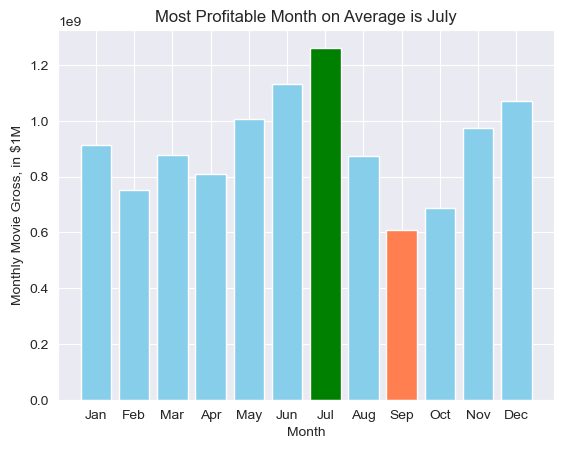

In [17]:
monthly_gross = month_list_df.groupby('month')['monthly_gross'].mean().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
sns.set_style("darkgrid")
cols = ['g' if (x == max(monthly_gross)) else 'coral' if (x == min(monthly_gross)) else 'skyblue' for x in monthly_gross]
plt.title("Most Profitable Month on Average is July")
plt.xlabel('Month')
plt.ylabel('Monthly Movie Gross, in $1M')
plt.bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], monthly_gross, color = cols)

#### Answer: 
The most profitable month is July, and the least profitable month is September.

### Question 2: How has industry performance changed over the selected time frame?
We will compare the total revenue for each year.

In [18]:
print(month_list_df.groupby('year')['monthly_gross'].sum())

year
2010    10585386940
2011    10155695359
2012    10843641372
2013    10955524800
2014    10368861849
2015    11148852953
2016    11375225455
2017    11075387520
2018    11892160011
2019    11363361617
Name: monthly_gross, dtype: object


A plot will make the data easier to interpret.

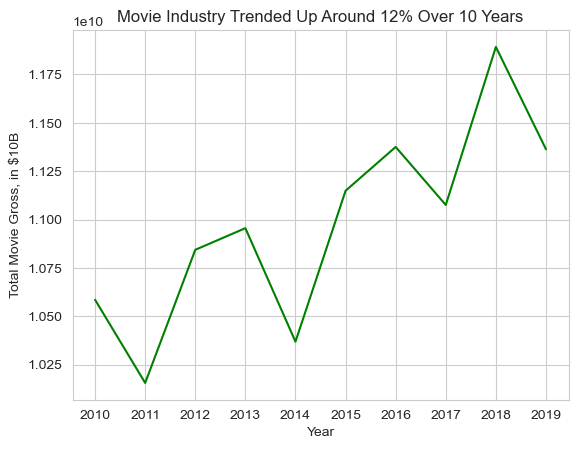

In [19]:
sns.set_style("whitegrid")
plt.title("Movie Industry Trended Up Around 12% Over 10 Years")
plt.xlabel('Year')
plt.ylabel('Total Movie Gross, in $10B')
plt.plot(month_list_df.groupby('year')['monthly_gross'].sum(), color = 'g')

#### Answer:
Yearly gross has increased steadily through moderate fluctuation, resulting in roughly twelve percent growth over ten years.

### Question 3: How does the performance of the top selling movie of each month compare to the rest of that month's movies?
We can answer this by looking at the percentage of monthly gross attributable to the top performing movie of each month.

In [20]:
print(month_list_df.groupby('month')['%_of_total'].mean().sort_values(ascending=False))

month
May          34.16
December     26.73
April        25.88
March        25.38
June         24.44
November     24.17
July         21.78
February     21.14
October      20.62
August       17.31
September    16.44
January      16.25
Name: %_of_total, dtype: float64


#### Answer:
The top performer is most likely to greatly outshine its competitors in the months of May, December, and April, whereas the months of January, September, and August are least likely to have a standout smash hit.

### Question 4: Which year featured the most theatrical releases?
This can be determined by totalling the number of releases for each of the ten years.

In [21]:
print(month_list_df.groupby('year')['releases'].sum().sort_values(ascending=False))

year
2018    2538
2014    2404
2012    2372
2016    2366
2013    2342
2019    2315
2011    2299
2017    2280
2015    2224
2010    2133
Name: releases, dtype: object


#### Answer:
The year with the most theatrical releases was 2018, and the year with the least was 2010.